# M_files_chap01/figure1_33.m

Python 3 implementation of the MATLAB code from the book:

<b>DAFX - Digital Audio Effects</b> <br>
Edited by Udo Zölzer<br>
ISBN: 978-0-470-66599-2<br>
Second Edition, John Wiley & Sons, 2011<br>
Matlab files source: http://ant-s4.unibw-hamburg.de/dafx/DAFX_Book_Page_2nd_edition/matlab.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import freqz
from plot_zplane import zplane
import matplotlib.image as mpimg
%matplotlib inline

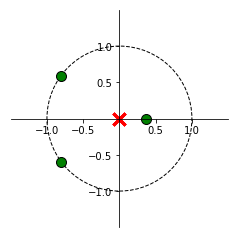

In [2]:
FS = 40000
h = [-.1, .15, .3, .15, -.1]
hmax = max(h)
hmin = min(h)
dh = hmax-hmin;
hmax = hmax+.1*dh
hmin = hmin-.1*dh
N = len(h)

# denominator polynomial:
a = [0]*N
a[0] = 1
zplane(h,a,'PolesZeros'); #check plot_zplane function

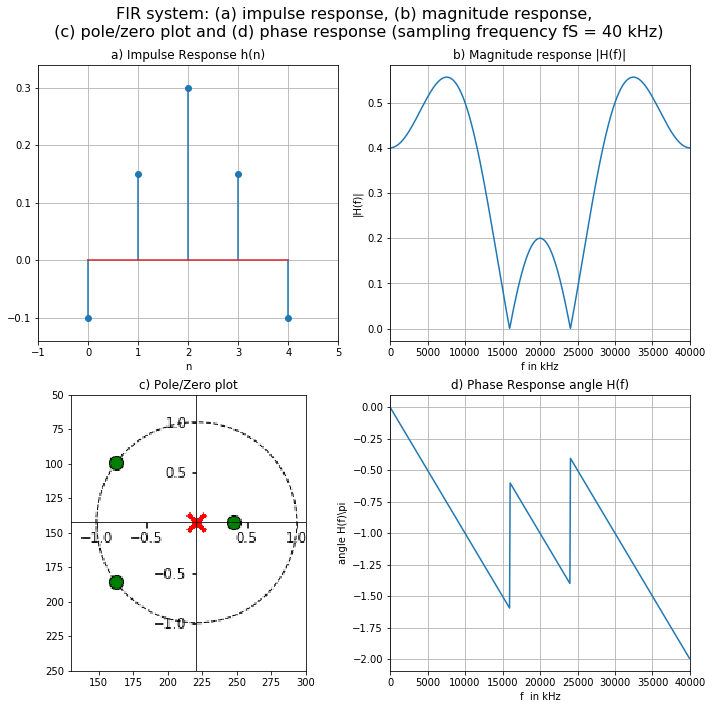

In [3]:
# Plotting
plt.rcParams['figure.figsize'] = (10, 10)# figure size

plt.subplot(223)
img=mpimg.imread('PolesZeros.png')
plt.imshow(img)
plt.title('c) Pole/Zero plot');
plt.xlim([130,300])
plt.ylim([250,50])

plt.subplot(221)
plt.stem(h)
plt.axis([-1, N, hmin, hmax])
plt.title('a) Impulse Response h(n)');
plt.xlabel('n')
plt.grid(True)


plt.subplot(222)
[W,H] =freqz(h,a,whole=True);
plt.plot(W/(2*np.pi)*FS,np.abs(H))
plt.xlabel('f in kHz');
plt.ylabel('|H(f)|');
plt.title('b) Magnitude response |H(f)|');
plt.xlim([0,40000])


plt.grid(True)

plt.subplot(224)
plt.plot(W/(2*np.pi)*FS,np.unwrap(np.angle(H))/np.pi)
plt.xlabel('f  in kHz')
plt.ylabel('angle H(f)\pi')
plt.title('d) Phase Response angle H(f)');
plt.xlim([0,40000])
plt.grid(True)

plt.suptitle('FIR system: (a) impulse response, (b) magnitude response, \n (c) pole/zero plot and ' 
             '(d) phase response (sampling frequency fS = 40 kHz)',size=16)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()